In [107]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

mpl.rc('figure', figsize=(8, 5))
mpl.rc('figure', dpi=300)

# Image Augmentation

In [108]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [109]:
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)

In [110]:
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:, :, :, np.newaxis]

In [111]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

In [112]:
X_train.shape, Y_train.shape

((240, 64, 64, 1), (240, 40))

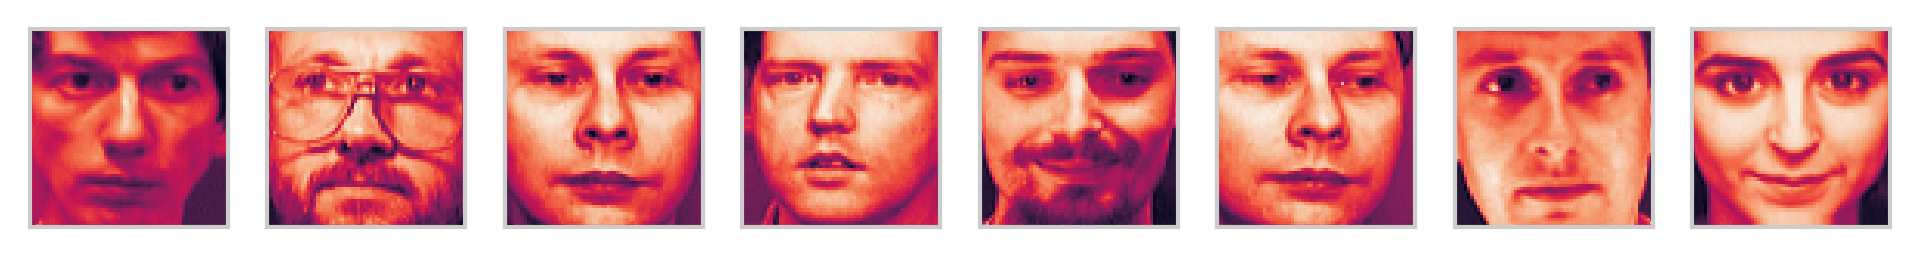

In [113]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [114]:
from keras.preprocessing.image import ImageDataGenerator

In [115]:
train_generator = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [116]:
train_generator.fit(X_train)

In [117]:
batch_size = 8

In [118]:
iterator = train_generator.flow(X_train[:batch_size], Y_train[:batch_size], batch_size=batch_size)

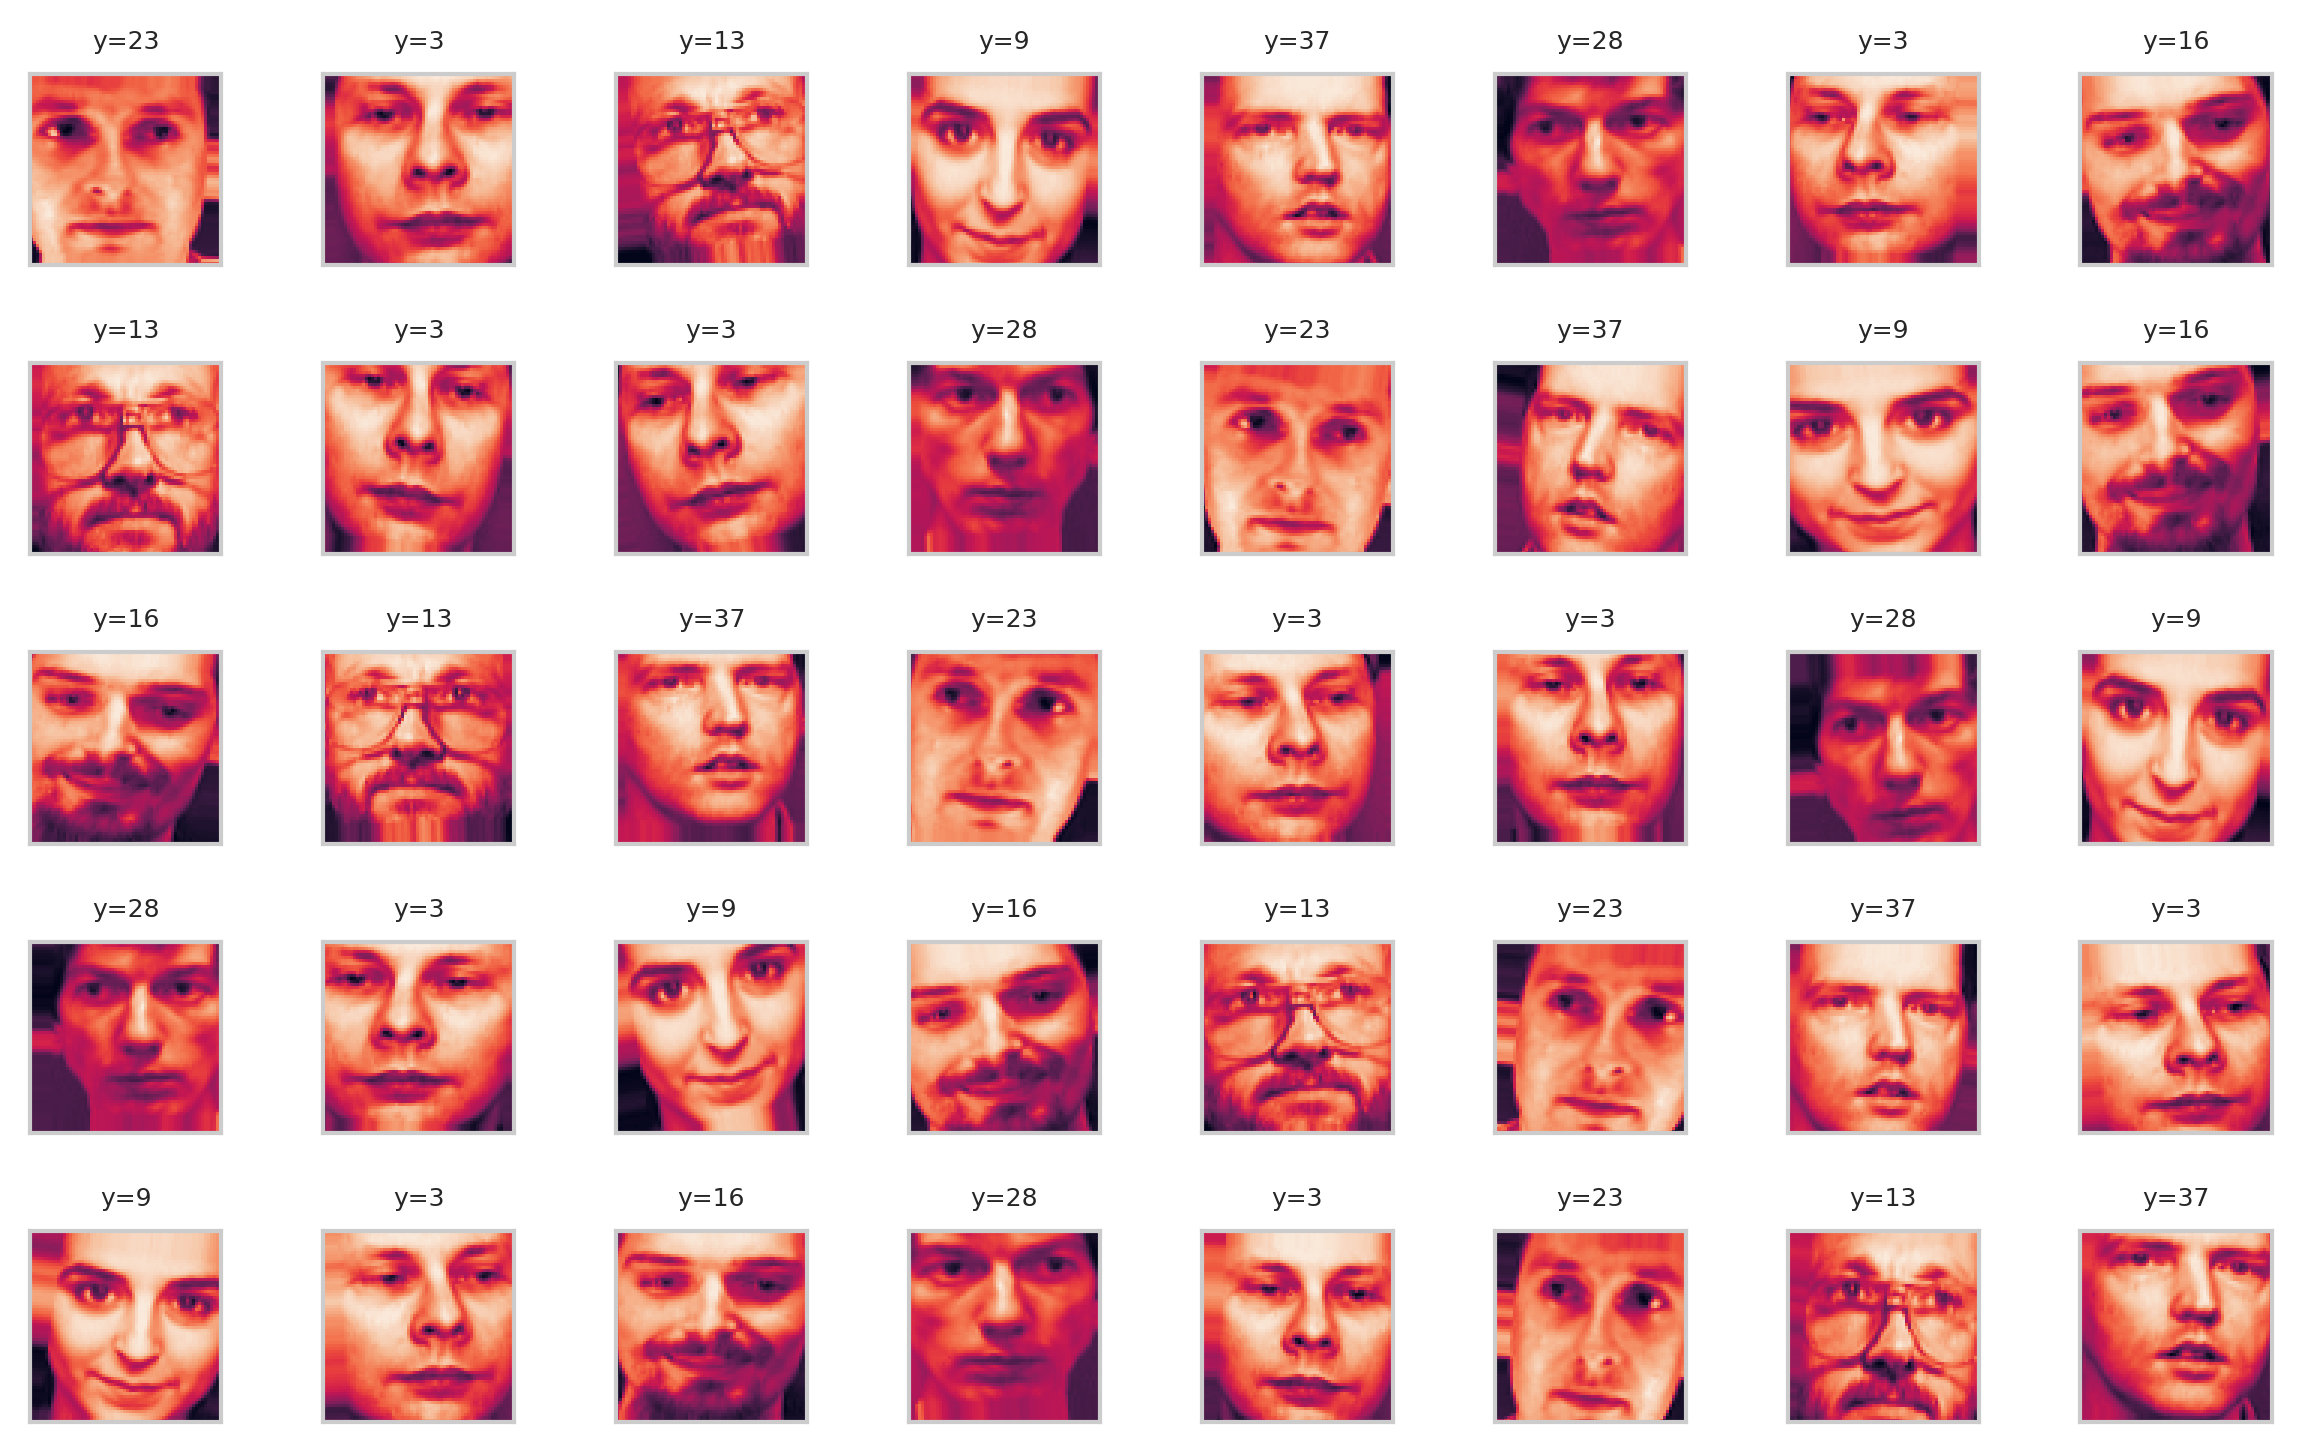

In [119]:
np.random.seed(0)
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0])
        plt.title("y={}".format(np.argmax(y_augs[j, :])), fontsize=6)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [120]:
test_generator = ImageDataGenerator()

In [121]:
train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

In [122]:
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

In [123]:
X_train_new.shape

(12000, 64, 64, 1)

In [124]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

In [125]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta, SGD
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu', padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop())

In [126]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
__________

In [127]:
%%time
hist1 = model.fit(X_train, Y_train, epochs=20, batch_size=120, validation_data=(X_test, Y_test), verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/20
 - 5s - loss: 4.3695 - acc: 0.0125 - val_loss: 3.8257 - val_acc: 0.0125
Epoch 2/20
 - 4s - loss: 3.8620 - acc: 0.0292 - val_loss: 3.6873 - val_acc: 0.0375
Epoch 3/20
 - 5s - loss: 3.6595 - acc: 0.0625 - val_loss: 3.6860 - val_acc: 0.0813
Epoch 4/20
 - 5s - loss: 3.6151 - acc: 0.1167 - val_loss: 3.6735 - val_acc: 0.0875
Epoch 5/20
 - 4s - loss: 3.5851 - acc: 0.0958 - val_loss: 3.6498 - val_acc: 0.0750
Epoch 6/20
 - 6s - loss: 3.4897 - acc: 0.1125 - val_loss: 3.6104 - val_acc: 0.0625
Epoch 7/20
 - 4s - loss: 3.3983 - acc: 0.0875 - val_loss: 3.5405 - val_acc: 0.0938
Epoch 8/20
 - 5s - loss: 3.2994 - acc: 0.2042 - val_loss: 3.3791 - val_acc: 0.1188
Epoch 9/20
 - 5s - loss: 3.1404 - acc: 0.2792 - val_loss: 3.4208 - val_acc: 0.0625
Epoch 10/20
 - 5s - loss: 3.1257 - acc: 0.1208 - val_loss: 3.3103 - val_acc: 0.2500
Epoch 11/20
 - 5s - loss: 2.7963 - acc: 0.4542 - val_loss: 2.8401 - val_acc: 0.3875
Epoch 12/20
 - 5s - loss: 2.7061 - acc:

In [128]:
%%time
hist2 = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=120, validation_data=(X_test, Y_test), verbose=2)

Train on 12000 samples, validate on 160 samples
Epoch 1/20
 - 158s - loss: 1.8667 - acc: 0.5411 - val_loss: 0.7019 - val_acc: 0.8500
Epoch 2/20
 - 156s - loss: 0.7469 - acc: 0.8341 - val_loss: 0.4305 - val_acc: 0.9250
Epoch 3/20
 - 159s - loss: 0.3632 - acc: 0.9291 - val_loss: 0.3489 - val_acc: 0.9125
Epoch 4/20
 - 165s - loss: 0.2100 - acc: 0.9600 - val_loss: 0.2308 - val_acc: 0.9375
Epoch 5/20
 - 165s - loss: 0.1263 - acc: 0.9789 - val_loss: 0.1593 - val_acc: 0.9625
Epoch 6/20
 - 168s - loss: 0.0928 - acc: 0.9821 - val_loss: 0.1737 - val_acc: 0.9562
Epoch 7/20
 - 166s - loss: 0.0674 - acc: 0.9873 - val_loss: 0.1792 - val_acc: 0.9500
Epoch 8/20
 - 178s - loss: 0.0404 - acc: 0.9938 - val_loss: 0.2104 - val_acc: 0.9438
Epoch 9/20
 - 193s - loss: 0.0346 - acc: 0.9941 - val_loss: 0.1592 - val_acc: 0.9562
Epoch 10/20
 - 190s - loss: 0.0280 - acc: 0.9950 - val_loss: 0.1500 - val_acc: 0.9562
Epoch 11/20
 - 179s - loss: 0.0269 - acc: 0.9939 - val_loss: 0.1958 - val_acc: 0.9437
Epoch 12/20
 - 

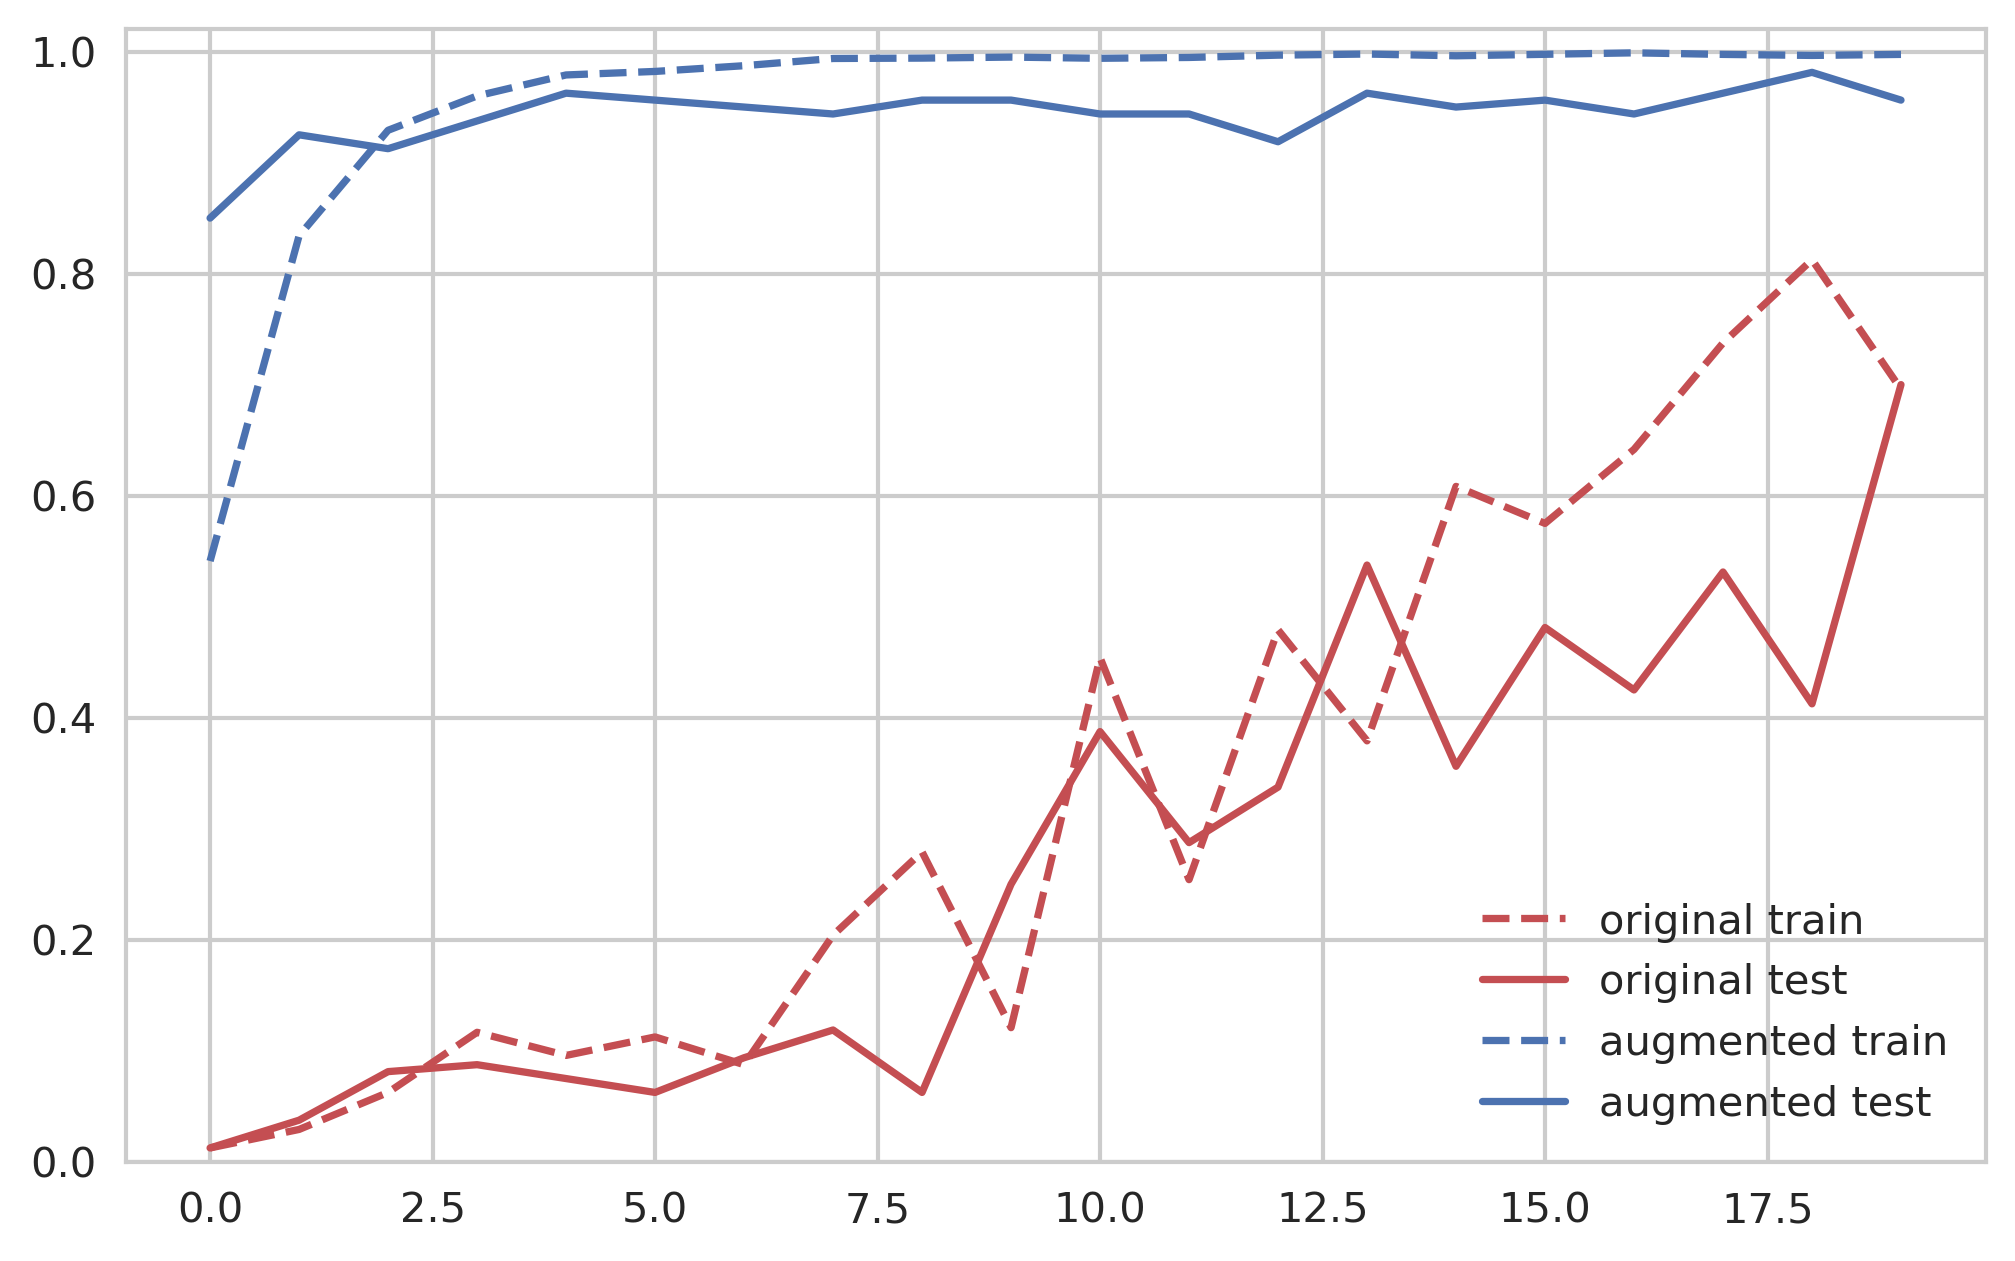

In [137]:
plt.plot(hist1.history['acc'], 'r--', label="original train")
plt.plot(hist1.history['val_acc'], 'r-', label="original test")
plt.plot(hist2.history['acc'], 'b--', label="augmented train")
plt.plot(hist2.history['val_acc'], 'b-', label="augmented test")
plt.ylim(0, 1.02)
plt.legend()
plt.show()